# Using Gradient Descend to Find Cubics

In [42]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
    
    Returns:
        y: The corresponding output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    return y

In [43]:
import numpy as np
import matplotlib.pyplot as plt

hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

[ 6.02621678  4.55449707 -1.62906782  9.86219409 -1.6676438   4.88616967
 -6.41786383 -7.60861928 -5.40845884  3.52874308 -3.77333251 -2.01453411
  6.11661843  4.35592457  6.33111493  0.3090598  -7.17515813  2.11759372
 -2.42753504  7.74780119 -6.77283867  5.88006296  6.31816831  4.29097458
  1.43961507 -1.45106537  1.36036288  2.69647599  4.50489783 -4.84371952
 -6.73344568 -1.03265066  2.6970099   8.44109645 -7.32487495  2.08939775
  1.93712185 -3.68692653 -9.99190807 -6.71340472 -9.70360373 -3.63746357
 -4.17506938 -2.46035276 -4.02580787 -8.51231021  4.31167958  7.0653048
  1.07533675  6.50620783  3.42630321 -8.71722564 -4.40037249  0.40016684
 -8.56699266 -7.65765097  7.05733551 -5.95506618 -9.38593387 -8.4122397
  6.83228554  5.98354054 -7.0836019   8.36241764  6.63154498  9.88967614
 -7.88234568 -4.37443051  3.81275366  9.91653647 -3.45425553  4.46789356
  7.44598101  6.55469665 -7.70569147 -2.97200918 -8.25087714 -2.72313497
 -8.83368744 -1.54562903  5.60549318 -8.40723746  3.5

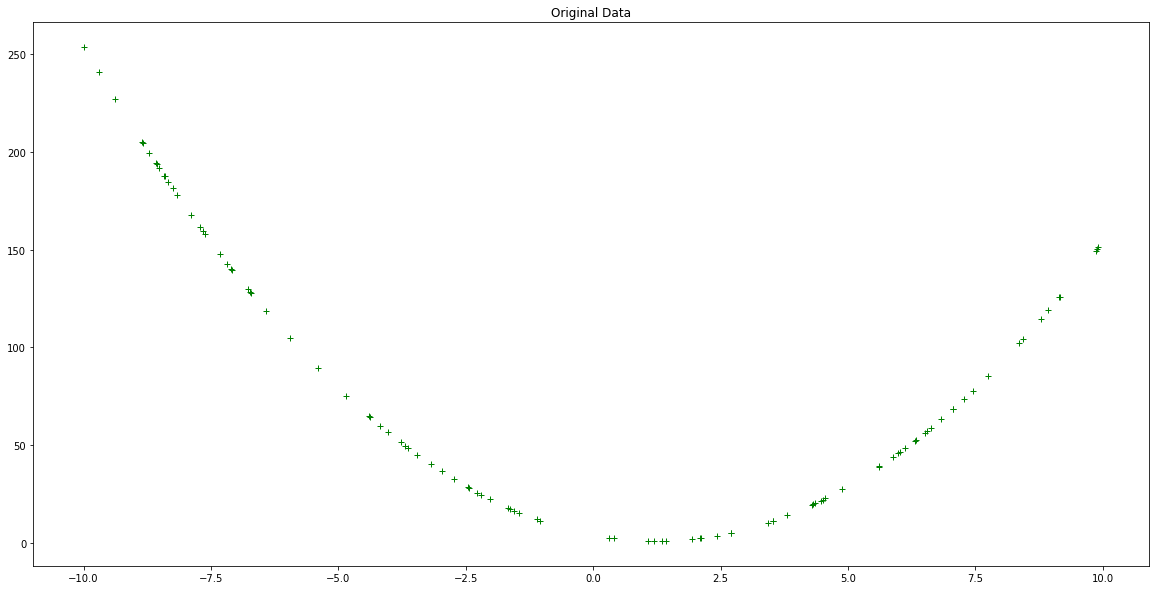

In [44]:
coeffs = [2, -5, 4]
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original Data')
plt.show()

In [45]:
import random

def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y−j,y+j].
    
    Args:
        coeffs: List containing the coefficients a,b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.
    
    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    
    """
    a = (coeffs[0]*(x*x))
    b = coeffs[1]*x
    c = coeffs[2]
    y = a+b+c
    
    interval = [y-j, y+j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max 
    
    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it 
                                                  # give a number greater than the interval min. 
    
    return jit_val

In [46]:
x=3
j=2
eval_2nd_degree_jitter(coeffs, x, j)

8.776613908071809

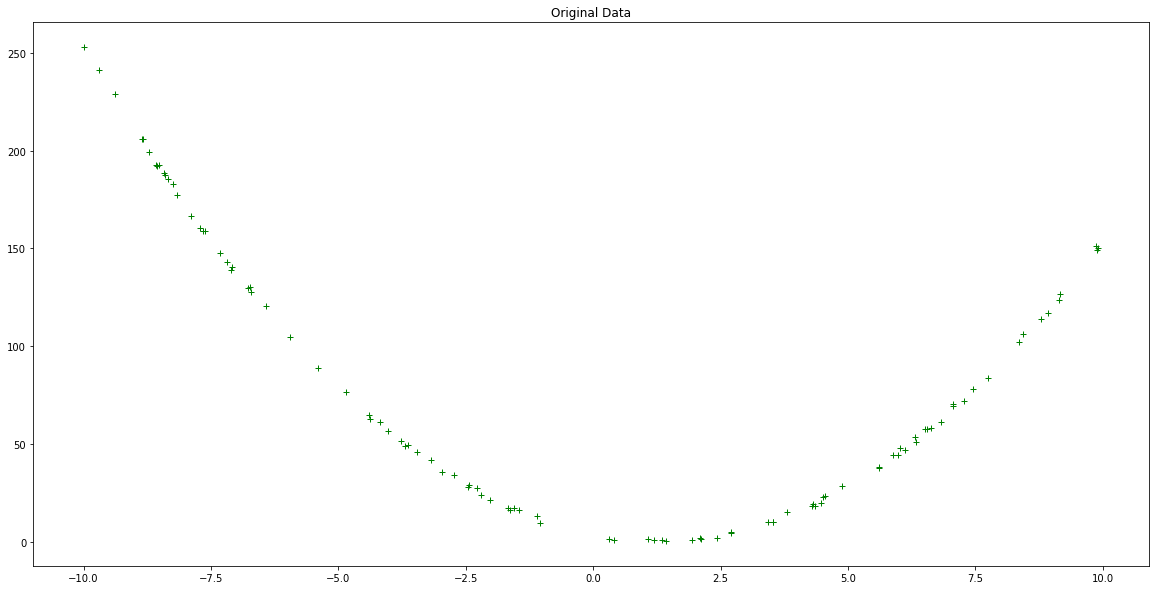

In [47]:
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original Data')
plt.show()

In [48]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
rand_coeffs

(9, -3, -4)

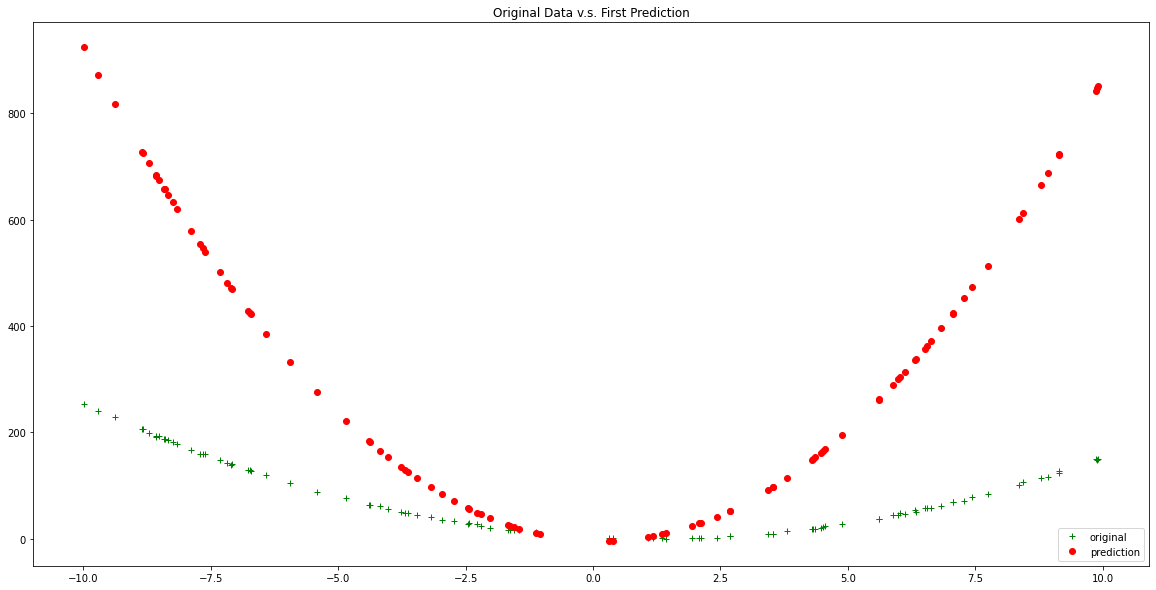

In [49]:
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original Data v.s. First Prediction')
plt.legend(loc="lower right")
plt.show()

In [50]:
def loss_mse(ys, y_bar):
    """
    Calculates Mean Squared Error (MSE) loss.
    
    Args:
        ys: training data labels
        y_bar: prediction labels
    
    Returns: Calculated MSE loss.
    """
    
    return sum( (ys-y_bar)**2) / len(ys)

initial_model_loss = loss_mse(ys, y_bar)
  
initial_model_loss

104959.2672926769

In [51]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr): 
    """
    calculates the gradient for a second degree polynomial.
    
    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate
        
    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.
    
    """
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**2        
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [52]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.
    
    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss. 
        lr: specified learning rate
        
    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

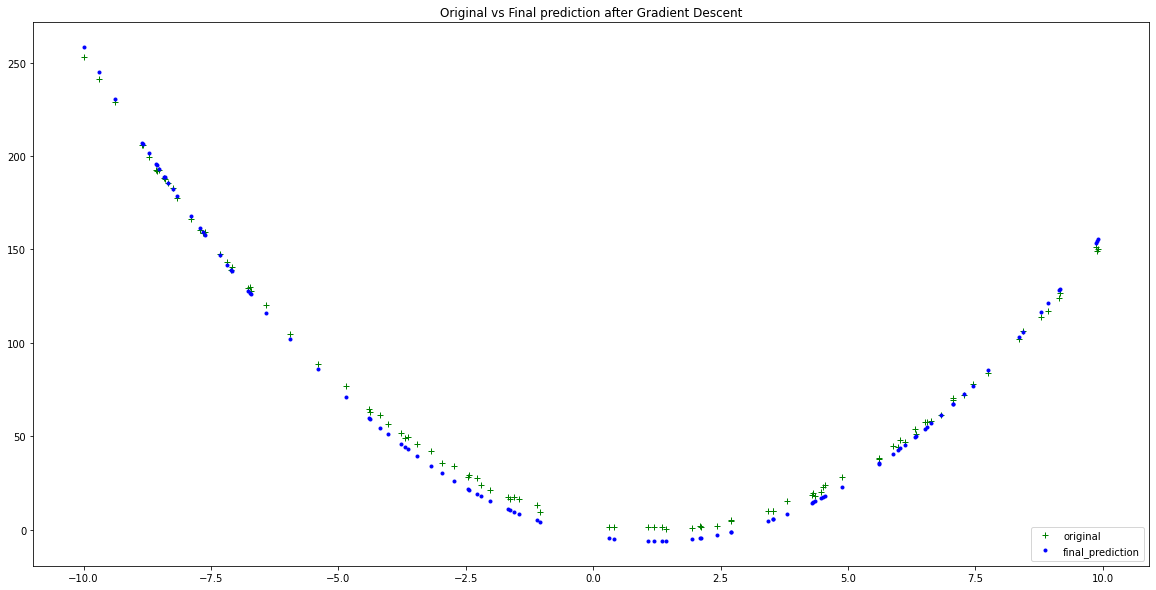

In [53]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [54]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")
print(f"MSE Loss: {GD[0]}")

Final Coefficients predicted: (2.1203983503435357, -5.008698301229663, -3.2468546087172965)
Original Coefficients: [2, -5, 4]
MSE Loss: 20.82616137124861


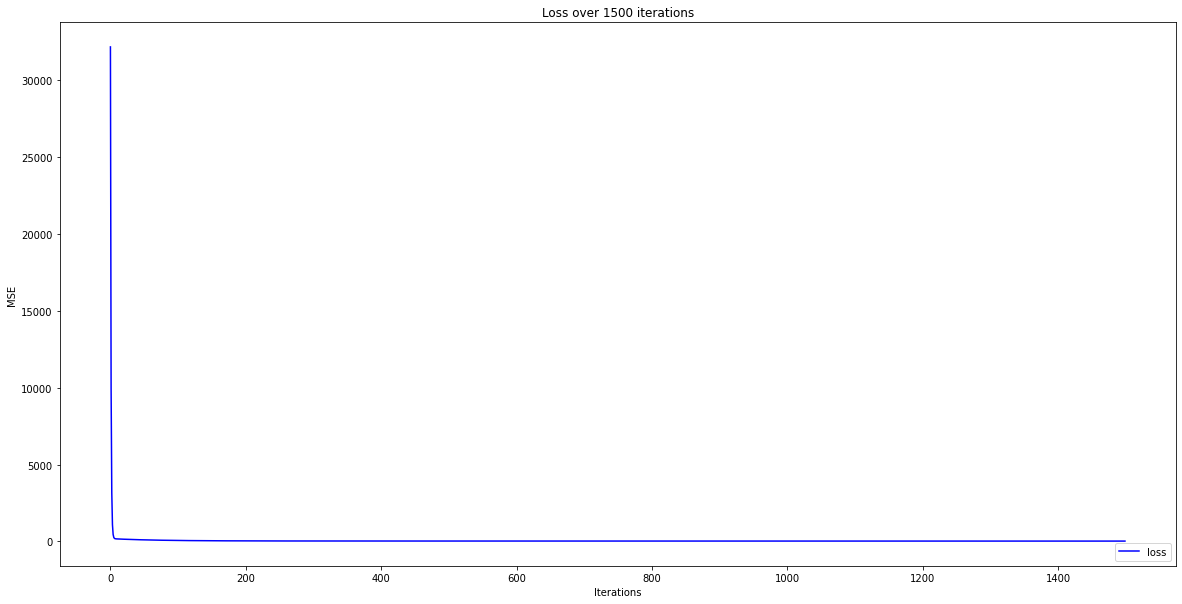

In [55]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()